Importations

In [1]:
import numpy as np
import autograd.numpy as np  
import matplotlib.pyplot as plt
from autograd import grad, hessian

In [11]:
def f_x(X): 
    return abs(X)

In [12]:

def sous_gradient_norm(f, x0, max_iter=1000, tol=1e-6):
    x = x0
    path = [x]  
    alpha = 5
    for i in range(max_iter):
        learning_rate = alpha / (i+1)
    
        if x > 0:
            s = 1
        elif x < 0:
            s = -1
        else:  
            s = np.random.uniform(-1, 1) 
        
        x_new = x - learning_rate * (s/np.linalg.norm(s))
        
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x = x_new
        path.append(x)
    
    return path


In [13]:

def sous_gradient_s(f, x0, max_iter=1000, tol=1e-6):
    x = x0
    path = [x]  
    for i in range(max_iter):
        learning_rate = 0.1
    
        if x > 0:
            s = 1
        elif x < 0:
            s = -1
        else:  
            s = np.random.uniform(-1, 1) 
        
        x_new = x - learning_rate * (s)
        
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x = x_new
        path.append(x)
    
    return path


In [14]:
def plot_convergence_2d(paths):
    """Affiche les chemins de convergence pour chaque méthode d'optimisation en 2D avec des lignes de niveau."""
    fig, ax = plt.subplots(figsize=(8, 6))

    # Créer un espace 2D pour visualiser les trajectoires
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = X**2 + 1.41*X*Y + Y**2  # Fonction en 2D dans l’espace x-y

    # Contours de niveau
    contour = ax.contour(X, Y, Z, levels=20, cmap="viridis")
    ax.clabel(contour, inline=True, fontsize=8)

    # Ajouter les trajectoires de chaque méthode
    for path in paths:
        x_vals = [p[0] for p in path]
        y_vals = [p[1] for p in path]
        ax.plot(x_vals, y_vals, marker='o', linestyle='-')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.set_title("Convergence Paths of Different Optimization Methods (2D Contour Plot)")
    plt.show()

Applications

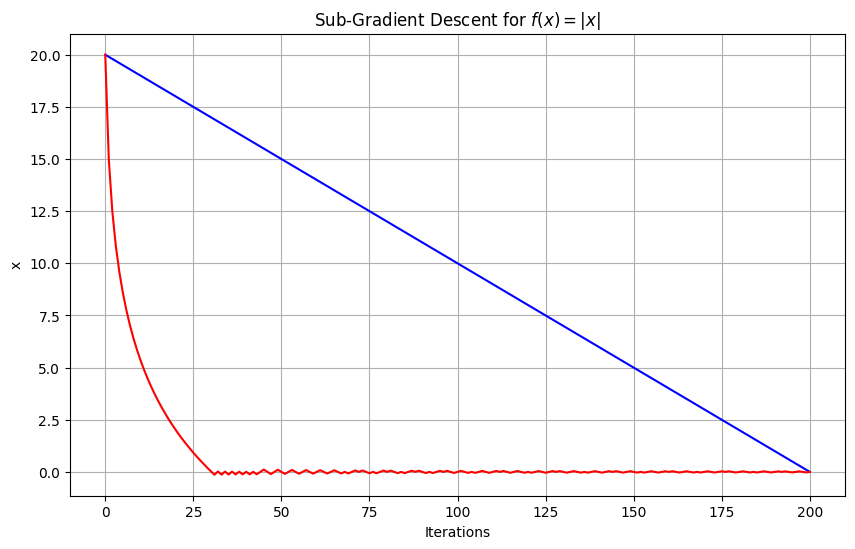

In [15]:
x0 = 20 
max_iter = 200
tol = 1e-6
f = lambda x: abs(x) 

path = sous_gradient_s(f, x0, max_iter=max_iter, tol=tol)
paths_norm = sous_gradient_norm(f,x0,max_iter=max_iter, tol=tol)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(path)), path, linestyle='-', color='b')
plt.plot(range(len(paths_norm)), paths_norm, linestyle='-', color='r')
plt.title("Sub-Gradient Descent for $f(x) = |x|$")
plt.xlabel("Iterations")
plt.ylabel("x")
plt.grid()
plt.show()

In [7]:
def sous_gradient_s(f, x0, max_iter=1000, tol=1e-6):
    x = x0
    path = [x]  
    for i in range(max_iter):
        learning_rate = 1 / (i+1)
        if x > 0:
            s = 1
        elif x < 0:
            s = -1
        else:  
            s = np.random.uniform(-1, 1) 
        
        x_new = x - learning_rate * (s)
        
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x = x_new
        path.append(x)
    
    return path


In [8]:
def gradient_norm_2(x0, y0, max_iter=1000, tol=1e-6):
    x, y = x0, y0
    path = [(x, y)]  
    for i in range(max_iter):
        learning_rate = 1 / (i + 1)
        # learning_rate = 0.1

        norm = np.sqrt(x**2 + y**2)
        if norm > 0:  
            grad_x = x / norm
            grad_y = y / norm
        else:
            grad_x, grad_y = 0, 0
        
        x_new = x - learning_rate * grad_x/np.linalg.norm(grad_x)
        y_new = y - learning_rate * grad_y/np.linalg.norm(grad_y)
        # x_new = x - learning_rate * grad_x
        # y_new = y - learning_rate * grad_y
        
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < tol:
            break
        
        x, y = x_new, y_new
        path.append((x, y))
    
    return path

<>:14: SyntaxWarning: invalid escape sequence '\|'
<>:16: SyntaxWarning: invalid escape sequence '\|'
<>:14: SyntaxWarning: invalid escape sequence '\|'
<>:16: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipykernel_5246/2585883878.py:14: SyntaxWarning: invalid escape sequence '\|'
  plt.title("Gradient Descent for $f(x, y) = \|(x, y)\|_2$")
/tmp/ipykernel_5246/2585883878.py:16: SyntaxWarning: invalid escape sequence '\|'
  plt.ylabel("$\|(x, y)\|_2$")


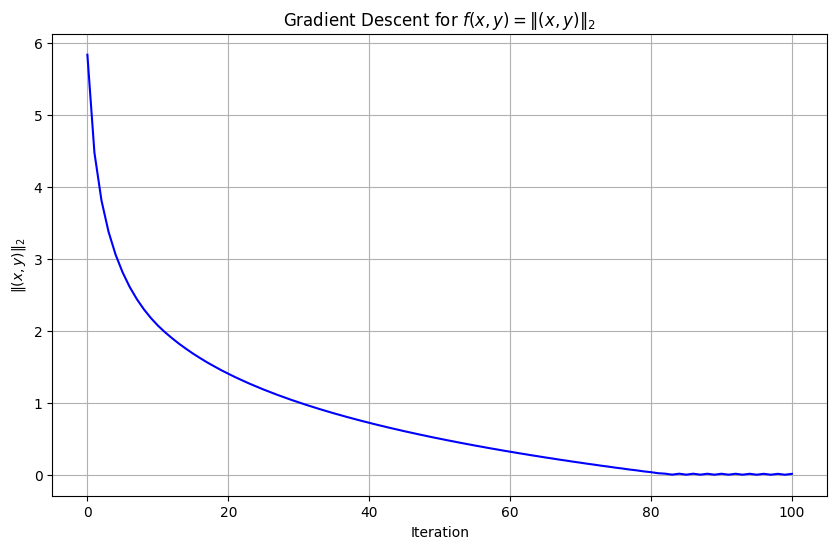

In [16]:
x0, y0 = 5, 3  # Initial point
max_iter = 100
tol = 1e-6

path = gradient_norm_2(x0, y0, max_iter=max_iter, tol=tol)

# Extract values for plotting
iterations = range(len(path))
norm_values = [np.sqrt(x**2 + y**2) for x, y in path]

# Plotting the norm
plt.figure(figsize=(10, 6))
plt.plot(iterations, norm_values, linestyle='-', color='b')
plt.title("Gradient Descent for $f(x, y) = \|(x, y)\|_2$")
plt.xlabel("Iteration")
plt.ylabel("$\|(x, y)\|_2$")
plt.grid()
plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\|'
<>:31: SyntaxWarning: invalid escape sequence '\|'
<>:28: SyntaxWarning: invalid escape sequence '\|'
<>:31: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipykernel_5246/3382362521.py:28: SyntaxWarning: invalid escape sequence '\|'
  ax.set_title("3D Gradient Descent for $f(x, y) = \|(x, y)\|_2$", fontsize=16, pad=20)
/tmp/ipykernel_5246/3382362521.py:31: SyntaxWarning: invalid escape sequence '\|'
  ax.set_zlabel("$\|(x, y)\|_2$", fontsize=12, labelpad=10)


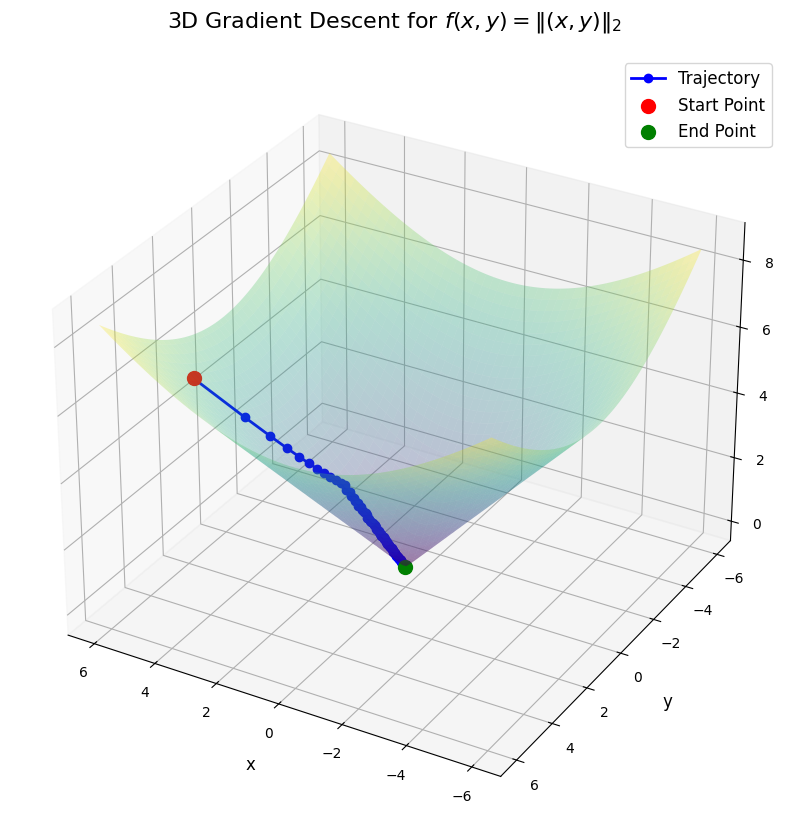

In [10]:

# Example usage
x0, y0 = 5, 3  # Initial point
max_iter = 100
tol = 1e-6

path = gradient_norm_2(x0, y0, max_iter=max_iter, tol=tol)

# Extract x and y coordinates
x_values = [x for x, y in path]
y_values = [y for x, y in path]
z_values = [np.sqrt(x**2 + y**2) for x, y in path]  # Objective function value

# 3D Plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot trajectory with visible markers
ax.plot(x_values, y_values, z_values, marker='o', linestyle='-', color='blue', label='Trajectory', linewidth=2)
ax.scatter(x_values[0], y_values[0], z_values[0], color='red', s=100, label='Start Point')
ax.scatter(x_values[-1], y_values[-1], z_values[-1], color='green', s=100, label='End Point')

# Add a 3D surface for better context
X, Y = np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100))
Z = np.sqrt(X**2 + Y**2)
ax.plot_surface(X, Y, Z, alpha=0.3, cmap='viridis', edgecolor='none')

# Enhance visual appearance
ax.set_title("3D Gradient Descent for $f(x, y) = \|(x, y)\|_2$", fontsize=16, pad=20)
ax.set_xlabel("x", fontsize=12, labelpad=10)
ax.set_ylabel("y", fontsize=12, labelpad=10)
ax.set_zlabel("$\|(x, y)\|_2$", fontsize=12, labelpad=10)
ax.view_init(elev=30, azim=120)  # Better perspective
ax.legend(fontsize=12)
ax.grid(True)

# Show the plot
plt.show()